### Group 1 —— Final Report Code
#### Group Member : Jih-Chin Chen / Chenjia Guo / Xin Ai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import colors 
from matplotlib import cm
import seaborn as sns
import sklearn.linear_model
from sklearn.metrics import confusion_matrix

%config InlineBackend.figure_format = 'retina'

### Part1 -> Jih-Chin Chen

In [2]:
# deal with data  -> plot1
df_hr = pd.read_excel('HR_Employee_Data.xlsx')
df_hr['salary'] = df_hr['salary'].astype('category')
df_hr['Department'] = df_hr['Department'].astype('category')

sales = df_hr[df_hr['Department'] == 'sales']
accounting = df_hr[df_hr['Department'] == 'accounting']
hr = df_hr[df_hr['Department'] == 'hr']
technical = df_hr[df_hr['Department'] == 'technical']
support = df_hr[df_hr['Department'] == 'support']
management = df_hr[df_hr['Department'] == 'management']
IT = df_hr[df_hr['Department'] == 'IT']
product_mng = df_hr[df_hr['Department'] == 'product_mng']
marketing = df_hr[df_hr['Department'] == 'marketing']
RandD = df_hr[df_hr['Department'] == 'RandD']
dep_dict={}
dep_value = [IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical]
dep_key = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
for k,v in zip(dep_key,dep_value):
    dep_dict[k] = len(v)

df_low = df_hr[(df_hr['salary'] == 'low') & (df_hr['left'] == 1)]
df_medium = df_hr[(df_hr['salary'] == 'medium') & (df_hr['left'] == 1)]
df_high = df_hr[(df_hr['salary'] == 'high') & (df_hr['left'] == 1)]
low = df_low.groupby('Department')['left'].sum()
medium = df_medium.groupby('Department')['left'].sum()
high = df_high.groupby('Department')['left'].sum()

rank = ['management','RandD','product_mng','IT','marketing','sales','support','technical','accounting','hr']
low_dict={}
medium_dict={}
high_dict={}
index = list(low.index)
low_values = list(low.values)
medium_values = list(medium.values)
high_values = list(high.values)
for i in range(10):
    low_dict[index[i]] = low_values[i]
    high_dict[index[i]] = high_values[i]
    medium_dict[index[i]] = medium_values[i]
    
work_hr = hr['Work_accident'].sum()/len(hr['Work_accident'])
work_avg = df_hr['Work_accident'].sum()/len(df_hr['Work_accident'])
promotion_hr = hr['promotion_last_5years'].sum()/len(hr['promotion_last_5years'])
promotion_avg = df_hr['promotion_last_5years'].sum()/len(df_hr['promotion_last_5years'])
low_hr = hr[hr['salary'] == 'low']['Emp_Id'].count()/len(hr['salary'])
low_avg = df_hr[df_hr['salary'] == 'low']['Emp_Id'].count()/len(df_hr['salary'])
medium_hr = hr[hr['salary'] == 'medium']['Emp_Id'].count()/len(hr['salary'])
medium_avg = df_hr[df_hr['salary'] == 'medium']['Emp_Id'].count()/len(df_hr['salary'])
high_hr = hr[hr['salary'] == 'high']['Emp_Id'].count()/len(hr['salary'])
high_avg = df_hr[df_hr['salary'] == 'high']['Emp_Id'].count()/len(df_hr['salary'])
work_hr,work_avg,promotion_hr,promotion_avg,low_hr,low_avg,medium_hr,medium_avg,high_hr,high_avg
size = [work_hr/work_avg, promotion_hr/promotion_avg,low_hr/low_avg,medium_hr/medium_avg,high_hr/high_avg]

<ipython-input-3-eaf91a7536c7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['0%','5%','10%','15%','20%','25%','30%'])


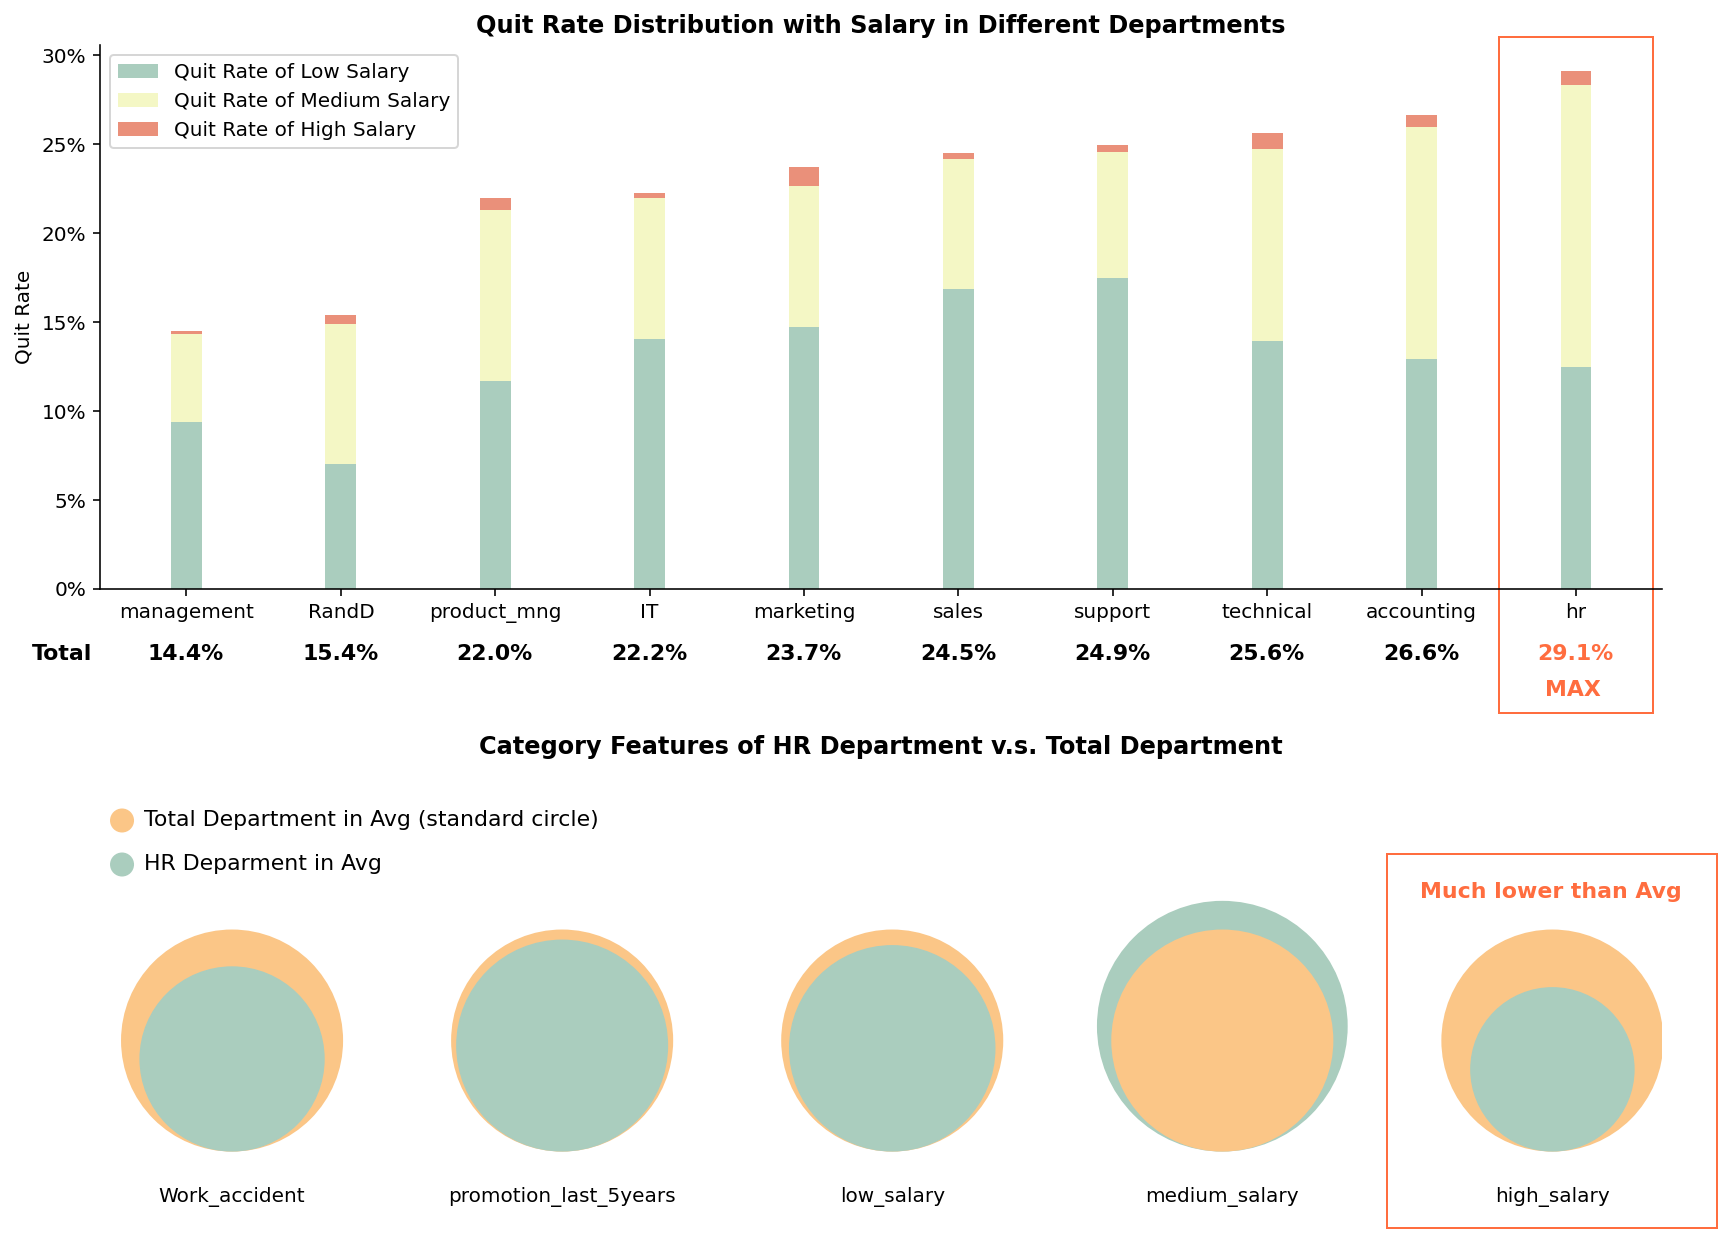

In [3]:
# Plot 1
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(14,11))
ax = ax.flatten()

# set color scheme / vertical / highlight info 
w=0.2
low_list = []
medium_list = []
high_list = []

for i in rank:
    low_list.append(low_dict[i]/dep_dict[i])
    medium_list.append(medium_dict[i]/dep_dict[i])
    high_list.append(high_dict[i]/dep_dict[i])

ax[0].bar(np.arange(10), low_list, width=w,label='Quit Rate of Low Salary',color='#AACDBE')
ax[0].bar(np.arange(10), medium_list, bottom=low_list, width=w,label='Quit Rate of Medium Salary',color='#F4F7C5')
ax[0].bar(np.arange(10), high_list, bottom=np.array(low_list) + np.array(medium_list), width=w,label='Quit Rate of High Salary',color='#EA907A')

# add title & text
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(rank)
ax[0].set_ylabel('Quit Rate')
ax[0].set_yticklabels(['0%','5%','10%','15%','20%','25%','30%'])
ax[0].set_title("Quit Rate Distribution with Salary in Different Departments",weight='bold')
for i in range(10):
    total = low_list[i]+medium_list[i]+high_list[i]
    if i == 9:
        ax[0].annotate(f'{total*100:.1f}%', (i-0.25, -0.04), size=11,weight='bold',color='#FF6D3F', annotation_clip=False)
        ax[0].annotate(f'MAX', (i-0.2, -0.06), size=11,weight='bold',color='#FF6D3F', annotation_clip=False)
    else:
        ax[0].annotate(f'{total*100:.1f}%', (i-0.25, -0.04), size=11,weight='bold', annotation_clip=False)
ax[0].annotate(f'Total', (-1, -0.04), size=11,weight='bold', annotation_clip=False)
# highlight
ax[0].add_patch(
    patches.Rectangle(
        xy=(8.5, -0.07),  # point of origin.
        width= 1,
        height= 0.38,
        linewidth=1,
        color='#FF6D3F',
        fill=False,
        clip_on=False
    )
)
# graph borders
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()

labels = ['','Work_accident','','','promotion_last_5years','','','low_salary','','','medium_salary','','','high_salary']

ax[1].set_xticks(range(14))
ax[1].set_xticklabels(labels)
ax[1].set_yticks(range(3))
ax[1].set_yticklabels([0,1,2])
ax[1].set_xlim(-0.2, 14)
ax[1].set_ylim(-0.2,3.5)
ax[1].tick_params(axis='x', bottom=False)
ax[1].tick_params(axis='y', left=False, labelleft=False)
ax[1].set_title('Category Features of HR Department v.s. Total Department',weight='bold')

for i in range(5):
    draw_circle = plt.Circle((i*3+1, 1), 1,color='#FBC687')
    ax[1].set_aspect(1)
    ax[1].add_artist(draw_circle)
    if i==3:
        draw_circle.set_zorder(1)
    else:
        draw_circle.set_zorder(0)

for i in range(5):
    draw_circle = plt.Circle((i*3+1, 1-(1-size[i])), size[i],color='#AACDBE')
    ax[1].set_aspect(1)
    ax[1].add_artist(draw_circle)
    if i==3:
        draw_circle.set_zorder(0)
    else:
        draw_circle.set_zorder(1)

draw_circle = plt.Circle((0, 3), 0.1,color='#FBC687')
ax[1].set_aspect(1)
ax[1].add_artist(draw_circle)
draw_circle = plt.Circle((0, 2.6), 0.1,color='#AACDBE')
ax[1].set_aspect(1)
ax[1].add_artist(draw_circle)

ax[1].annotate(f'Total Department in Avg (standard circle)', (0.2, 2.95), size=11, annotation_clip=False)
ax[1].annotate(f'HR Deparment in Avg', (0.2, 2.55), size=11, annotation_clip=False)
ax[1].annotate(f'Much lower than Avg', (11.8, 2.3), size=11, annotation_clip=False,color='#FF6D3F',weight='bold')
ax[1].add_patch(
    patches.Rectangle(
        xy=(11.5, -0.7),
        width= 3,
        height= 3.4,
        linewidth=1,
        color='#FF6D3F',
        fill=False,
        clip_on=False
    )
)

# graph borders
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
#plt.savefig('fig_1.png')
plt.show()

In [4]:
# deal with data -> plot 2
df_hr = pd.read_excel('HR_Employee_Data.xlsx')
df_hr['salary'] = df_hr['salary'].astype('category')
df_hr['Department'] = df_hr['Department'].astype('category')

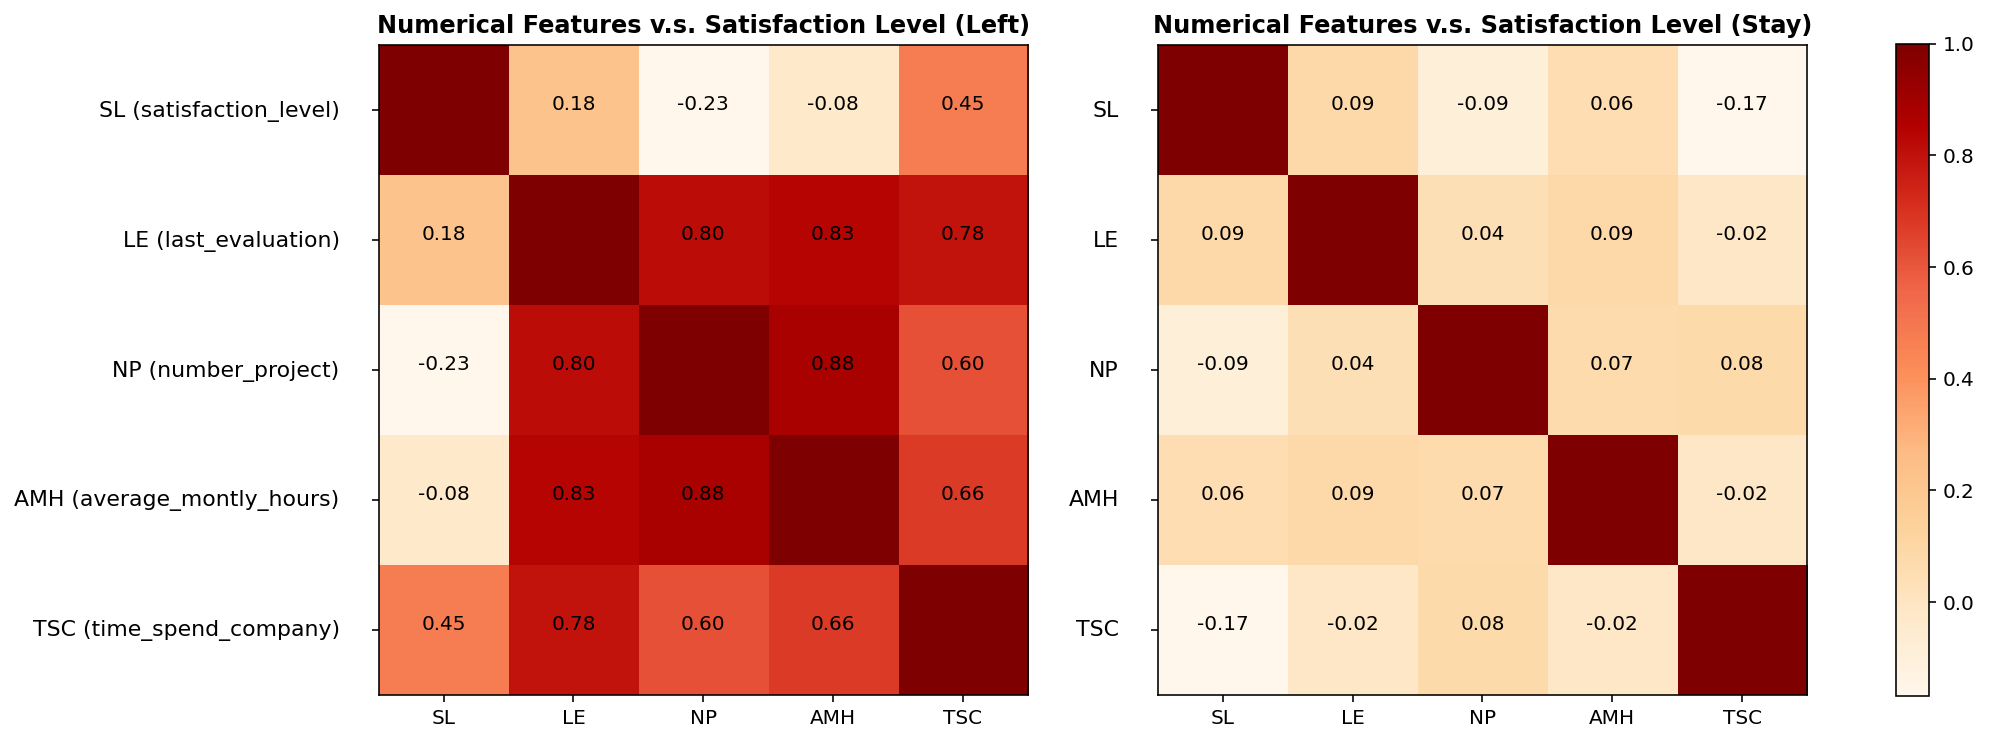

In [5]:
# Plot 1
list_interest = ['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company']
df_sub1 = df_hr[df_hr['left'] == 1]
df_sub1 = df_sub1[list_interest]
matrix = df_sub1.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
im = ax[0].imshow(matrix, cmap='OrRd')
for x in range(len(list_interest)):
    for y in range(len(list_interest)):
        if x!=y:
            ax[0].text(x,y,f"{matrix.iloc[x,y]:.2f}", horizontalalignment='center')
ax[0].set_xticks(range(len(list_interest)))
ax[0].set_yticks(range(len(list_interest)))
ax[0].tick_params(axis='y', labelleft=False)
ax[0].set_xticklabels(['SL','LE','NP','AMH','TSC'])
ax[0].set_yticklabels(['SL','LE','NP','AMH','TSC'])
y_label = ['SL','LE','NP','AMH','TSC']
ax[0].set_title("Numerical Features v.s. Satisfaction Level (Left)",weight='bold')
for i in range(5):
    ax[0].annotate(f"{y_label[i]} ({df_sub1.columns[i]})", (-0.8, i+0.05), size=11, annotation_clip=False, horizontalalignment='right')

    #2
df_sub2 = df_hr[df_hr['left'] == 0]
df_sub2 = df_sub2[list_interest]
matrix = df_sub2.corr()

im = ax[1].imshow(matrix, cmap='OrRd')
for x in range(len(list_interest)):
    for y in range(len(list_interest)):
        if x!=y:
            ax[1].text(x,y,f"{matrix.iloc[x,y]:.2f}", horizontalalignment='center')
ax[1].set_xticks(range(len(list_interest)))
ax[1].set_yticks(range(len(list_interest)))
ax[1].tick_params(axis='y', labelleft=False)
ax[1].set_xticklabels(['SL','LE','NP','AMH','TSC'])
ax[1].set_yticklabels(['SL','LE','NP','AMH','TSC'])
y_label = ['SL','LE','NP','AMH','TSC']
ax[1].set_title("Numerical Features v.s. Satisfaction Level (Stay)",weight='bold')
for i in range(5):
    ax[1].annotate(f"{y_label[i]}", (-0.8, i+0.05), size=11, annotation_clip=False, horizontalalignment='right')

fig.colorbar(im, ax=ax, shrink=.75)
plt.show()

### Part2 -> Chenjia Guo

In [6]:
# deal with data -> plot 3
df = pd.read_excel('HR_Employee_Data.xlsx')
df['Work_accident'] = df['Work_accident'].astype('category').copy()
df['left'] = df['left'].astype('category').copy()
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category').copy()
df['salary'] = df['salary'].astype('category').copy()
df['salary']=df['salary'].cat.reorder_categories(['low','medium','high'])
df['Department'] = df['Department'].astype('category').copy()
df_left = df[(df['left'] == 1)].copy()
df_stay = df[(df['left'] == 0)].copy()

df_num = df[(df['number_project'] <= 3)|(df['number_project']>= 5 )].copy()
count_num = df_num[(df_num['left']==1)].copy()
percentage_num = len(count_num) / len(df_num)

df_low = df_num[(df_num['salary'] == 'low')].copy()
count_low_left = df_low[(df_low['left'] ==1)].copy()
percentage_low = len(count_low_left)/len(df_low)

df_eva_low = df_low[(df_low['last_evaluation'] >=0.87)].copy()
count_eva_low = df_eva_low[(df_eva_low['left']==1)].copy()
percentage_eva_low = len(count_eva_low) / len(df_eva_low)

df_eva_low_hour = df_eva_low[(df_eva_low['average_montly_hours']<= 156) | (df_eva_low['average_montly_hours'] >= 245)].copy()
count_eva_low_hour = df_eva_low_hour[(df_eva_low_hour['left']==1)].copy()
percentage_eva_low_hour = len(count_eva_low_hour) / len(df_eva_low_hour)

df_eva_low_hour_satis = df_eva_low_hour[(df_eva_low_hour['satisfaction_level'] <= 0.44)].copy()
count_eva_low_hour_satis = df_eva_low_hour_satis[(df_eva_low_hour_satis['left']==1)].copy()
percentage_eva_low_hour_satis = len(count_eva_low_hour_satis) / len(df_eva_low_hour_satis)

avg_left_hour = df_left['average_montly_hours'].mean()
avg_stay_hour = df_stay['average_montly_hours'].mean()

add_percentage1 = [None,percentage_num,percentage_low,percentage_eva_low,percentage_eva_low_hour,percentage_eva_low_hour_satis]


stay_percentage1 = [None]
stay_percentage1.append(1-add_percentage1[1])
stay_percentage1.append(1-add_percentage1[2])
stay_percentage1.append(1-add_percentage1[3])
stay_percentage1.append(1-add_percentage1[4])
stay_percentage1.append(1-add_percentage1[5])

add_percentage = [percentage_num,percentage_low,percentage_eva_low,percentage_eva_low_hour,percentage_eva_low_hour_satis]
stay_percentage = [1-a for a in add_percentage]



avg_left_satis = df_left['satisfaction_level'].mean()
avg_stay_satis =  df_stay['satisfaction_level'].mean()

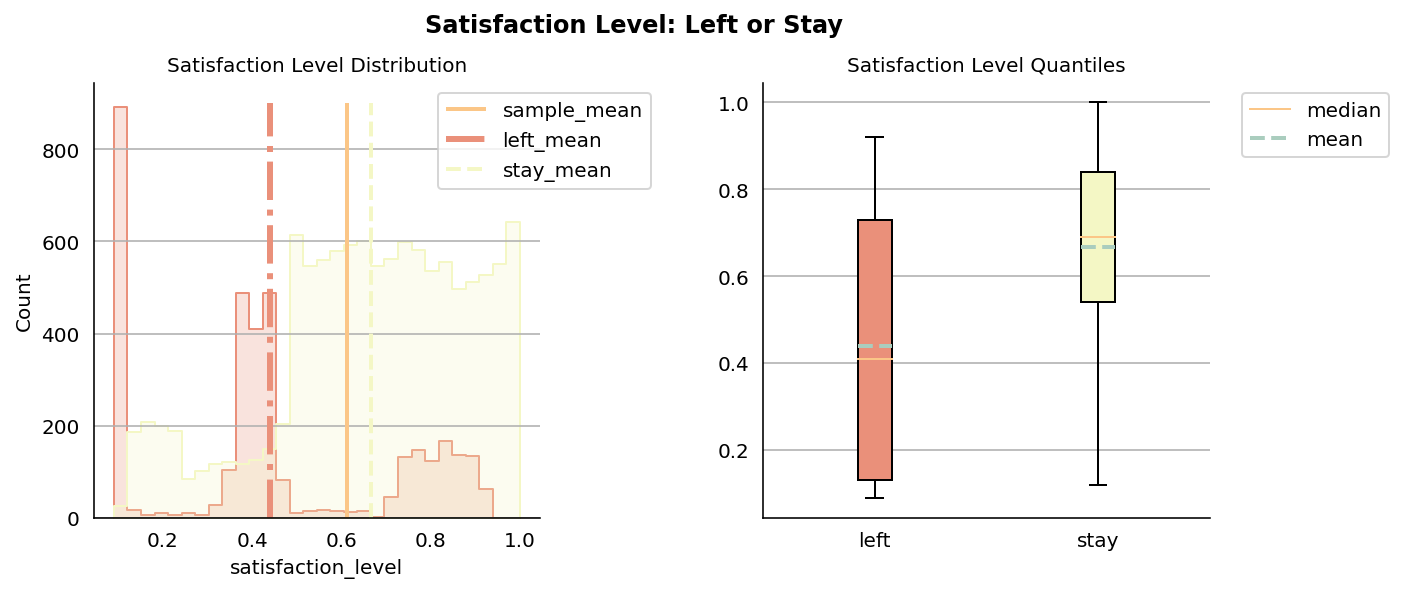

In [7]:
# Plot 3
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

palette = {1:"#ea907a",
           0:"#f4f7c5"}

sns.histplot(data = df, x="satisfaction_level", hue="left", element="step",ax = ax[0],palette = palette)

satisfy_left = df_left['satisfaction_level'].values
satisfy_stay = df_stay['satisfaction_level'].values

medianc = dict(linestyle='-', linewidth=1, color='#fbc687',label = 'median')
meanlineprops = dict(linestyle='--', linewidth=2, color='#aacdbe',label = 'mean')

medianc1 = dict(linestyle='-', linewidth=1, color='#fbc687')
meanlineprops1 = dict(linestyle='--', linewidth=2, color='#aacdbe')

satisfy = [satisfy_left,satisfy_stay]

avg_satis = df['satisfaction_level'].mean()

ax[0].vlines(x = avg_satis, ymin = 0, ymax = 900,ls = 'solid',lw = 2, color = '#fbc687',label = 'sample_mean')
ax[0].vlines(x = avg_left_satis, ymin = 0, ymax = 900,ls = 'dashdot', lw = 3,color = '#ea907a',label = 'left_mean')
ax[0].vlines(x = avg_stay_satis, ymin = 0, ymax = 900,ls = 'dashed',lw = 2, color = '#f4f7c5',label = 'stay_mean')


ax[0].legend(bbox_to_anchor=(0.75, 1), loc='upper left')
ax[0].yaxis.grid(True)
ax[0].tick_params(axis='x', bottom=False)
ax[0].tick_params(axis='y', left=False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Satisfaction Level Distribution',fontsize = 10)

colors = ['#ea907a','#f4f7c5']

bx1 = ax[1].boxplot(satisfy[0],positions = [1],patch_artist=True,medianprops = medianc,meanline = True,showmeans = True,meanprops=meanlineprops)
for patch in bx1['boxes']:
    patch.set_facecolor('#ea907a')
bx2 = ax[1].boxplot(satisfy[1],positions = [2],patch_artist=True,medianprops = medianc1,meanline = True,showmeans = True,meanprops=meanlineprops1)
for patch in bx2['boxes']:
    patch.set_facecolor('#f4f7c5')

ax[1].set_xticklabels(['left','stay'])
ax[1].yaxis.grid(True)
ax[1].tick_params(axis='x', bottom=False)
ax[1].tick_params(axis='y', left=False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_title('Satisfaction Level Quantiles',fontsize = 10)

plt.suptitle('Satisfaction Level: Left or Stay',weight = 'bold',y = 1.0, horizontalalignment = 'center')
fig.subplots_adjust(wspace=0.5)

#plt.savefig('satisfy.png',dpi = 200, bbox_inches = 'tight')
plt.show()

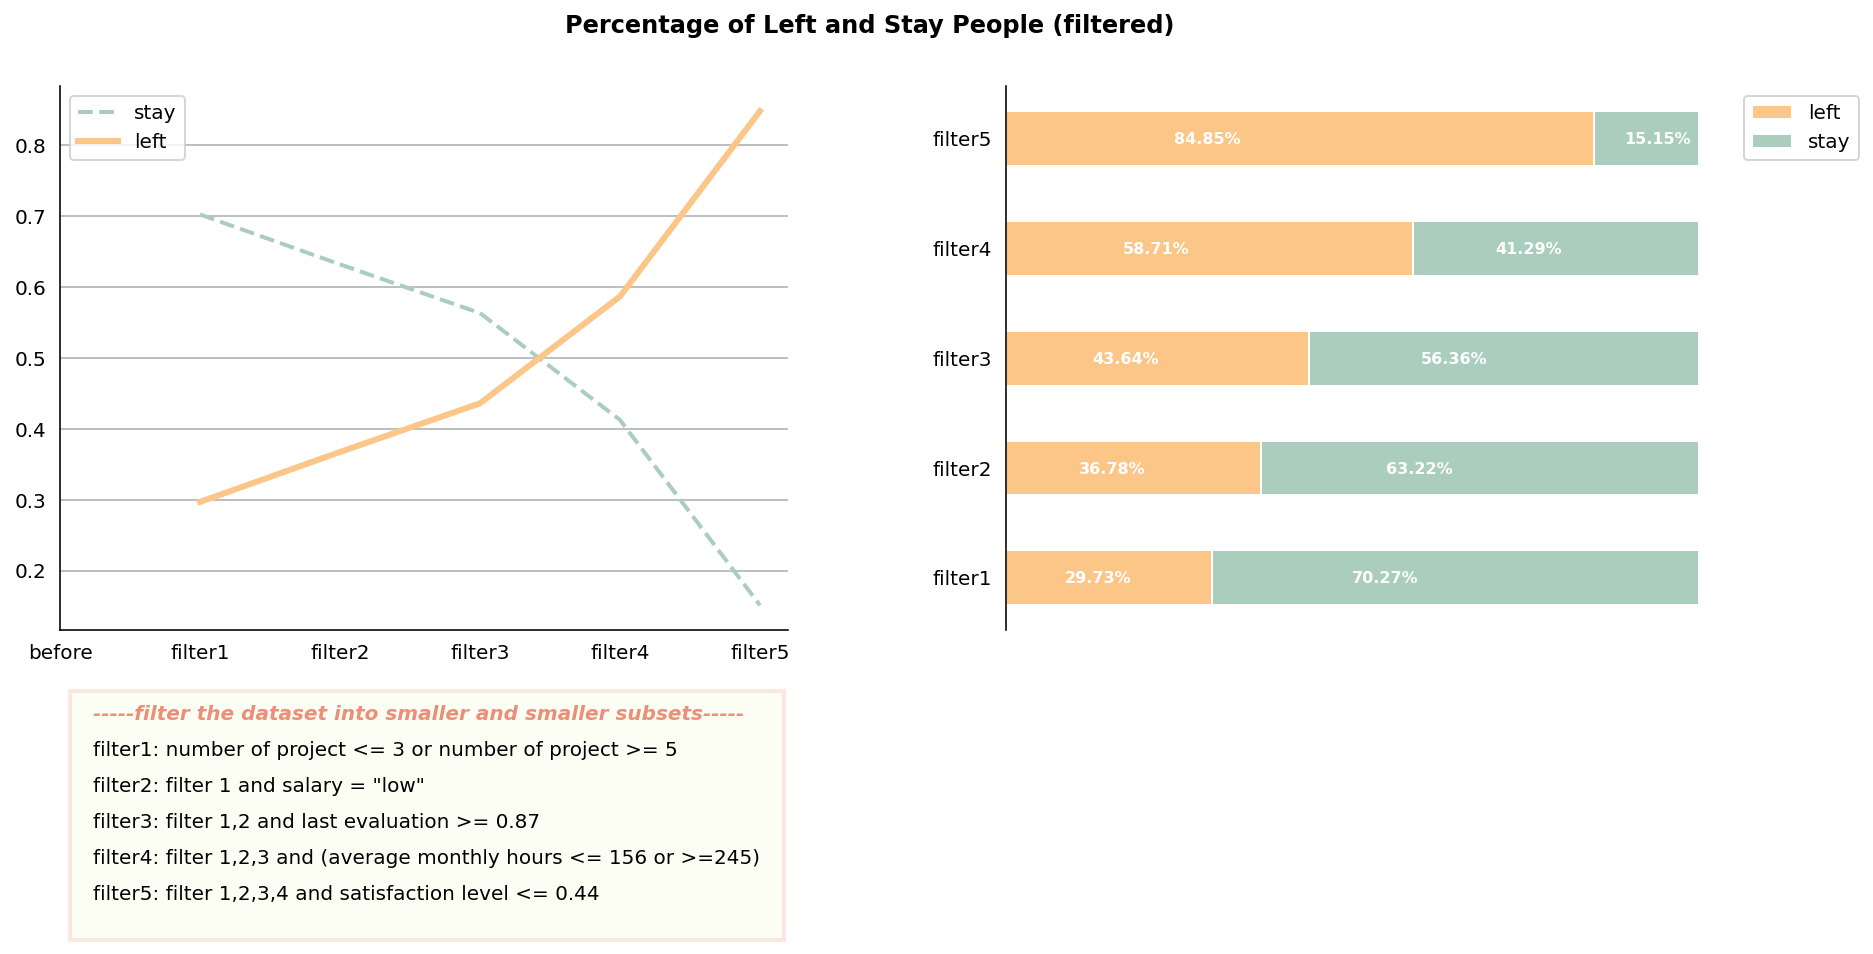

In [8]:
# Plot 4
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

ax[0].plot(stay_percentage1, lw = 2,ls = 'dashed',label = 'stay',color = '#aacdbe')
ax[0].plot(add_percentage1,lw = 3,label = 'left',color = '#fbc687')

left_per =np.array(add_percentage)
stay_per = np.array(stay_percentage)


ax[1].barh([0,1,2,3,4], left_per,height = 0.5, color='#fbc687', label="left",edgecolor='white')
ax[1].barh([0,1,2,3,4], stay_per, height = 0.5, left = left_per, color='#aacdbe',edgecolor='white', label="stay")

ax[0].legend()
ax[0].tick_params(axis='x', bottom=False)
ax[0].tick_params(axis='y', left=False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlim(xmin = 0)

ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
ax[1].set_xticks([])
ax[1].tick_params(axis='y', left=False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
plt.suptitle('Percentage of Left and Stay People (filtered)',weight = 'bold')

for i, rect in enumerate(ax[1].patches):
    h = rect.get_height() 
    w = rect.get_width()  
    x = rect.get_x()+ w/3.5 
    y = rect.get_y()+h/2.5 
    label = f"{w*100:.2f}%"
    ax[1].annotate(label, (x, y),color='white',size=8,weight = 'bold')


fig.subplots_adjust(wspace=0.3)

txt1 = '-----filter the dataset into smaller and smaller subsets-----'

txt2 = 'filter1: number of project <= 3 or number of project >= 5'
txt3 = 'filter2: filter 1 and salary = "low"'
txt4 = 'filter3: filter 1,2 and last evaluation >= 0.87'
txt5 = 'filter4: filter 1,2,3 and (average monthly hours <= 156 or >=245)'
txt6 = 'filter5: filter 1,2,3,4 and satisfaction level <= 0.44'

fig.text(0.14,0,txt1,style = 'italic',weight = 'bold',color = '#ea907a',fontsize = 10)
fig.text(0.14,-0.05,txt2)
fig.text(0.14,-0.1,txt3)
fig.text(0.14,-0.15,txt4)
fig.text(0.14,-0.2,txt5)
fig.text(0.14,-0.25,txt6)

#ax.annotate('Filtered by condition: salary = low \n salary = low & hours <= 156 | hours >= 157', 
             ##c='#5779AD',
            # size=12, weight='bold')
ax[0].set_xticks(np.arange(6))
ax[0].set_xticklabels(['before','filter1','filter2','filter3','filter4','filter5'])
ax[0].yaxis.grid(True)

ax[1].set_yticks(np.arange(5))
ax[1].set_yticklabels(['filter1','filter2','filter3','filter4','filter5'])

ax[0].add_patch(
    patches.Rectangle(
        xy=(0.07, 0.03),  # point of origin.
        width= 5.1,
        height= -0.35,
        linewidth=2,
        facecolor= '#f4f7c5',
        edgecolor = '#ea907a',
        alpha = .2,
        clip_on=False
    )
)


#plt.savefig('percentage.png',dpi = 200, bbox_inches = 'tight')
plt.show()

### Part3 -> Xin Ai

In [9]:
# deal with data -> plot 5
df_hr=pd.read_excel('HR_Employee_Data.xlsx')
df_hr['left']=df_hr['left'].astype('category')
df_hr['Work_accident']=df_hr['Work_accident'].astype('category')
df_hr['promotion_last_5years']=df_hr['promotion_last_5years'].astype('category')
df_hr['Department']=df_hr['Department'].astype('category')
df_hr['salary']=df_hr['salary'].astype('category')
df_hr['salary']=df_hr['salary'].cat.reorder_categories(['low','medium','high'])
low_satis_stay = df_hr.loc[(df_hr['satisfaction_level']<0.64) & (df_hr['left']==0)].copy()
low_satis_left = df_hr.loc[(df_hr['satisfaction_level']<0.64) & (df_hr['left']==1)].copy()
high_satis_stay = df_hr.loc[(df_hr['satisfaction_level']>=0.64) & (df_hr['left']==0)].copy()
high_satis_left = df_hr.loc[(df_hr['satisfaction_level']>=0.64) & (df_hr['left']==1)].copy()
lowsatstay_improper_projects=len(low_satis_stay[(low_satis_stay['number_project']<3) | (low_satis_stay['number_project']>5)])/len(low_satis_stay)
lowsatstay_proper_projects=len(low_satis_stay[(low_satis_stay['number_project']>=3) & (low_satis_stay['number_project']<=5)])/len(low_satis_stay)
lowsatleft_improper_projects=len(low_satis_left[(low_satis_left['number_project']<3) | (low_satis_left['number_project']>5)])/len(low_satis_left)
lowsatleft_proper_projects=len(low_satis_left[(low_satis_left['number_project']>=3) & (low_satis_left['number_project']<=5)])/len(low_satis_left)
lowsatstay_improper_workhours=len(low_satis_stay[(low_satis_stay['average_montly_hours']<156) | (low_satis_stay['average_montly_hours']>245)])/len(low_satis_stay)
lowsatstay_proper_workhours=len(low_satis_stay[(low_satis_stay['average_montly_hours']>=156) & (low_satis_stay['average_montly_hours']<=245)])/len(low_satis_stay)
lowsatleft_improper_workhours=len(low_satis_left[(low_satis_left['average_montly_hours']<156) | (low_satis_left['average_montly_hours']>245)])/len(low_satis_left)
lowsatleft_proper_workhours=len(low_satis_left[(low_satis_left['average_montly_hours']>=156) & (low_satis_left['average_montly_hours']<=245)])/len(low_satis_left)
lowsatstay_long_commuting=len(low_satis_stay[(low_satis_stay['time_spend_company']>3)])/len(low_satis_stay)
lowsatstay_short_commuting=len(low_satis_stay[(low_satis_stay['time_spend_company']<=3)])/len(low_satis_stay)
lowsatleft_long_commuting=len(low_satis_left[(low_satis_left['time_spend_company']>3)])/len(low_satis_left)
lowsatleft_short_commuting=len(low_satis_left[(low_satis_left['time_spend_company']<=3)])/len(low_satis_left)
lowsatstay_work_accident=len(low_satis_stay[(low_satis_stay['Work_accident']==1)])/len(low_satis_stay)
lowsatstay_no_accident=len(low_satis_stay[(low_satis_stay['Work_accident']==0)])/len(low_satis_stay)
lowsatleft_work_accident=len(low_satis_left[(low_satis_left['Work_accident']==1)])/len(low_satis_left)
lowsatleft_no_accident=len(low_satis_left[(low_satis_left['Work_accident']==0)])/len(low_satis_left)
lowsatstay_no_promotion=len(low_satis_stay[(low_satis_stay['promotion_last_5years']==0)])/len(low_satis_stay)
lowsatstay_promotion=len(low_satis_stay[(low_satis_stay['promotion_last_5years']==1)])/len(low_satis_stay)
lowsatleft_no_promotion=len(low_satis_left[(low_satis_left['promotion_last_5years']==0)])/len(low_satis_left)
lowsatleft_promotion=len(low_satis_left[(low_satis_left['promotion_last_5years']==1)])/len(low_satis_left)
lowsatstay_bad_salary=len(low_satis_stay[(low_satis_stay['salary']=='low')])/len(low_satis_stay)
lowsatstay_good_salary=len(low_satis_stay[(low_satis_stay['salary']!='low')])/len(low_satis_stay)
lowsatleft_bad_salary=len(low_satis_left[(low_satis_left['salary']=='low')])/len(low_satis_left)
lowsatleft_good_salary=len(low_satis_left[(low_satis_left['salary']!='low')])/len(low_satis_left)

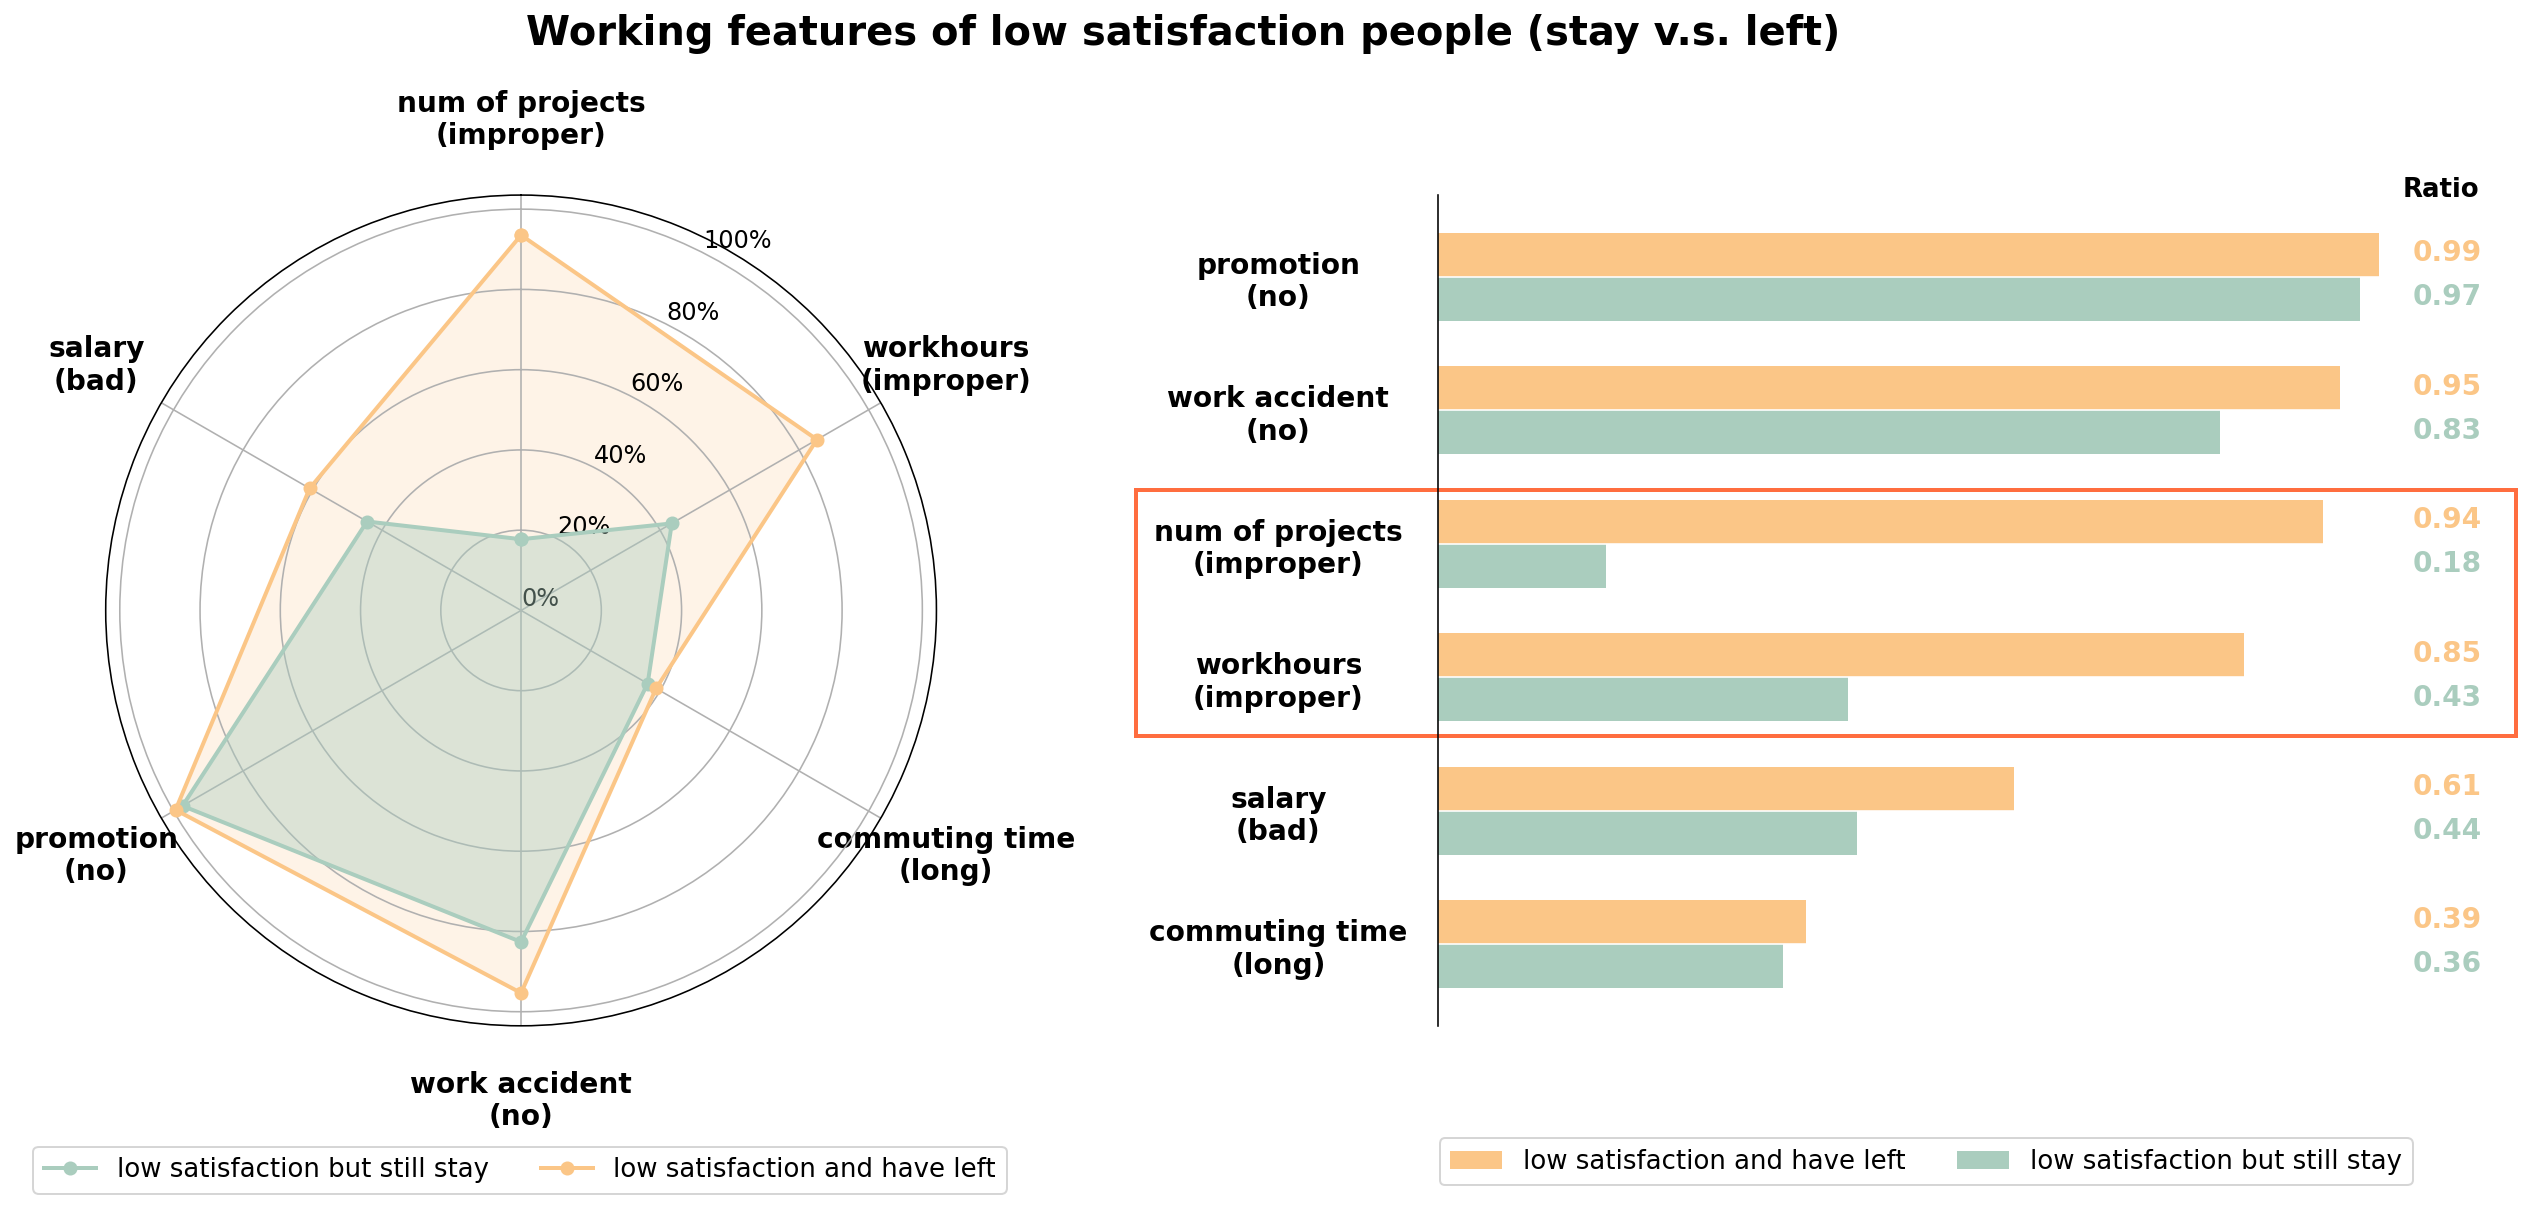

In [10]:
# Plot 5
fig, ax=plt.subplots(figsize=(18,8))

# radar plot -----------------------
ax0=plt.subplot(121, projection='polar')

categories=['num of projects\n(improper)', 'workhours\n(improper)', 'commuting time\n(long)', 
            'work accident\n(no)', 'promotion\n(no)', 'salary\n(bad)']

lowsatstay=[lowsatstay_improper_projects, lowsatstay_improper_workhours, lowsatstay_long_commuting, 
            lowsatstay_no_accident, lowsatstay_no_promotion, lowsatstay_bad_salary, lowsatstay_improper_projects]
lowsatleft=[lowsatleft_improper_projects, lowsatleft_improper_workhours, lowsatleft_long_commuting, 
            lowsatleft_no_accident, lowsatleft_no_promotion, lowsatleft_bad_salary, lowsatleft_improper_projects]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(lowsatstay))

ax0.plot(label_loc, lowsatstay, '#AACDBE', label='low satisfaction but still stay', marker="o", linewidth=2)
ax0.plot(label_loc, lowsatleft, '#FBC687', label='low satisfaction and have left', marker="o", linewidth=2)
ax0.fill(label_loc, lowsatstay, '#AACDBE', alpha = 0.4, zorder=10)
ax0.fill(label_loc, lowsatleft, '#FBC687', alpha = 0.2, zorder=1)

lines, labels = plt.thetagrids(angles=range(0, 360, int(360/len(categories))), 
                               labels=categories, weight='bold', fontsize=14)

for label,angle in zip(labels,range(0,360,int(360/len(categories)))):
    ax0.set_theta_offset(np.pi/2.0)
    ax0.set_theta_direction(-1)
    ax0.set_rlabel_position(27)
    ax0.set_rorigin(0)
    ax0.tick_params(axis='x',direction='out', pad=27, left=False)
    ax0.set_yticks((0, .2, .4, .6, .8, 1))
    ax0.set_yticklabels(['0%','20%','40%','60%','80%','100%'], rotation=0, size=12, zorder=100)
    
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.1, -.13), fontsize=13)

# line plot -----------------------
ax1=plt.subplot(122)

stay1=[lowsatleft_long_commuting,lowsatleft_bad_salary,lowsatleft_improper_workhours,
       lowsatleft_improper_projects,lowsatleft_no_accident,lowsatleft_no_promotion]
left1=[lowsatstay_long_commuting,lowsatstay_bad_salary,lowsatstay_improper_workhours,
       lowsatstay_improper_projects,lowsatstay_no_accident,lowsatstay_no_promotion]
stay2=[lowsatleft_short_commuting,lowsatleft_good_salary,lowsatleft_proper_workhours,
       lowsatleft_proper_projects,lowsatleft_work_accident,lowsatleft_promotion]
left2=[lowsatstay_short_commuting,lowsatleft_good_salary,lowsatstay_proper_workhours,
       lowsatstay_proper_projects,lowsatstay_work_accident,lowsatstay_promotion]

w=.33
ax1.barh(np.arange(6)+0.5*w, stay1, w, color='#FBC687', label='low satisfaction and have left')
ax1.barh(np.arange(6)-0.5*w, left1, w, color='#AACDBE', label='low satisfaction but still stay')

ratio1=[0.39,0.61,0.85,0.94,0.95,0.99]
ratio2=[0.36,0.44,0.43,0.18,0.83,0.97]
for i, rect in enumerate(ax1.patches):
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()+ w/2.4 
    y = rect.get_y()+h/2.8
    if i in np.arange(0,6):
        ax1.annotate(ratio1[i], (1.03, y), color='#FBC687', annotation_clip=False, weight='bold', size=14)
    elif i in np.arange(6,12): 
        ax1.annotate(ratio2[i-6], (1.03, y), color='#AACDBE', annotation_clip=False, weight='bold', size=14)
ax1.annotate('Ratio', (1.02, 5.6), size=13, weight='bold',annotation_clip=False)

ax1.tick_params(axis='x', bottom=False, labelbottom=False)
ax1.set_yticks((0,1,2,3,4,5))
ax1.tick_params(axis='y', length=0, direction='out', pad=80, labelsize=14)
ax1.set_yticklabels(['commuting time\n(long)','salary\n(bad)','workhours\n(improper)',
                     'num of projects\n(improper)','work accident\n(no)','promotion\n(no)'], 
                    ha='center', weight='bold')

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.add_patch(patches.Rectangle(xy=(-.32, 1.56), width=1.46, height=1.84, linewidth=2, color='#FF6D3F', fill=False, clip_on=False))

plt.grid(axis = 'y', color='white')
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.0, -.12), fontsize=13)

plt.figtext(0.48, 1.02, 'Working features of low satisfaction people (stay v.s. left)', ha='center', size=20, weight='bold')
plt.tight_layout()
plt.show()

In [11]:
# deal with data -> plot 6
highsatstay_improper_projects=len(high_satis_stay[(high_satis_stay['number_project']>5)])/len(high_satis_stay)
highsatstay_proper_projects=len(high_satis_stay[(high_satis_stay['number_project']<=5)])/len(high_satis_stay)
highsatleft_improper_projects=len(high_satis_left[(high_satis_left['number_project']>5)])/len(high_satis_left)
highsatleft_proper_projects=len(high_satis_left[(high_satis_left['number_project']<=5)])/len(high_satis_left)
highsatstay_improper_workhours=len(high_satis_stay[(high_satis_stay['average_montly_hours']>245)])/len(high_satis_stay)
highsatstay_proper_workhours=len(high_satis_stay[(high_satis_stay['average_montly_hours']<=245)])/len(high_satis_stay)
highsatleft_improper_workhours=len(high_satis_left[(high_satis_left['average_montly_hours']>245)])/len(high_satis_left)
highsatleft_proper_workhours=len(high_satis_left[(high_satis_left['average_montly_hours']<=245)])/len(high_satis_left)
highsatstay_long_commuting=len(high_satis_stay[(high_satis_stay['time_spend_company']>3)])/len(high_satis_stay)
highsatstay_short_commuting=len(high_satis_stay[(high_satis_stay['time_spend_company']<=3)])/len(high_satis_stay)
highsatleft_long_commuting=len(high_satis_left[(high_satis_left['time_spend_company']>3)])/len(high_satis_left)
highsatleft_short_commuting=len(high_satis_left[(high_satis_left['time_spend_company']<=3)])/len(high_satis_left)
highsatstay_work_accident=len(high_satis_stay[(high_satis_stay['Work_accident']==1)])/len(high_satis_stay)
highsatstay_no_accident=len(high_satis_stay[(high_satis_stay['Work_accident']==0)])/len(high_satis_stay)
highsatleft_work_accident=len(high_satis_left[(high_satis_left['Work_accident']==1)])/len(high_satis_left)
highsatleft_no_accident=len(high_satis_left[(high_satis_left['Work_accident']==0)])/len(high_satis_left)
highsatstay_no_promotion=len(high_satis_stay[(high_satis_stay['promotion_last_5years']==0)])/len(high_satis_stay)
highsatstay_promotion=len(high_satis_stay[(high_satis_stay['promotion_last_5years']==1)])/len(high_satis_stay)
highsatleft_no_promotion=len(high_satis_left[(high_satis_left['promotion_last_5years']==0)])/len(high_satis_left)
highsatleft_promotion=len(high_satis_left[(high_satis_left['promotion_last_5years']==1)])/len(high_satis_left)
highsatstay_bad_salary=len(high_satis_stay[(high_satis_stay['salary']=='low')])/len(high_satis_stay)
highsatstay_good_salary=len(high_satis_stay[(high_satis_stay['salary']!='low')])/len(high_satis_stay)
highsatleft_bad_salary=len(high_satis_left[(high_satis_left['salary']=='low')])/len(high_satis_left)
highsatleft_good_salary=len(high_satis_left[(high_satis_left['salary']!='low')])/len(high_satis_left)


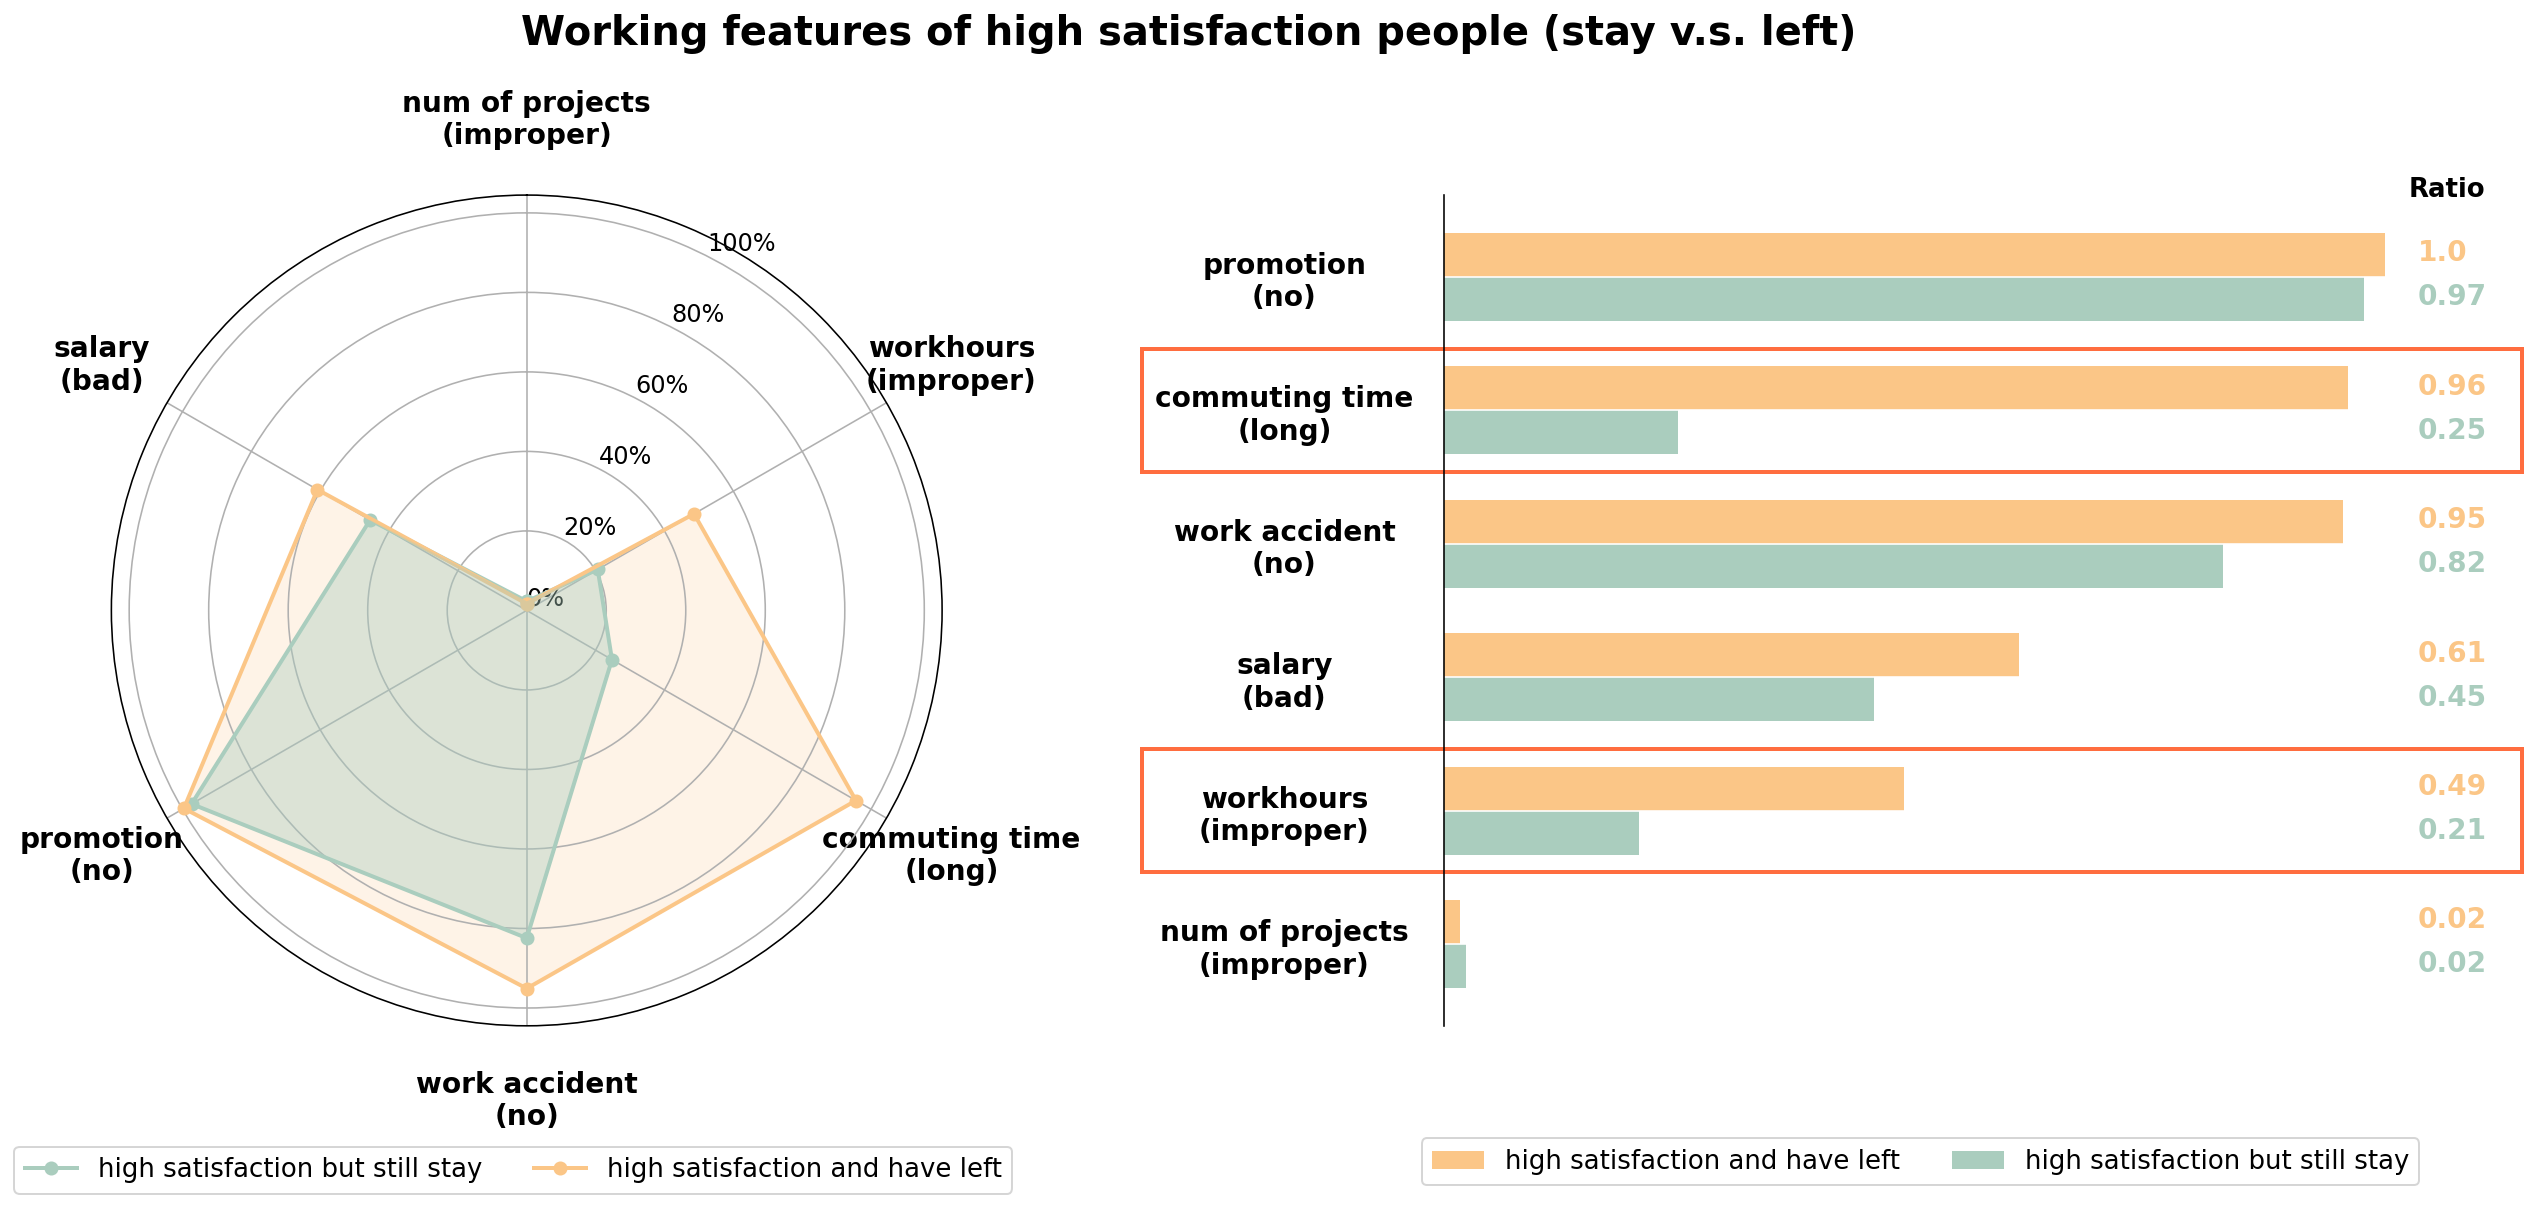

In [12]:
# Plot 6
fig, ax=plt.subplots(figsize=(18,8))

# radar plot -----------------------
ax0=plt.subplot(121, projection='polar')

categories=['num of projects\n(improper)', 'workhours\n(improper)', 'commuting time\n(long)', 
            'work accident\n(no)', 'promotion\n(no)', 'salary\n(bad)']

highsatstay=[highsatstay_improper_projects, highsatstay_improper_workhours, highsatstay_long_commuting, 
            highsatstay_no_accident, highsatstay_no_promotion, highsatstay_bad_salary, highsatstay_improper_projects]
highsatleft=[highsatleft_improper_projects, highsatleft_improper_workhours, highsatleft_long_commuting, 
            highsatleft_no_accident, highsatleft_no_promotion, highsatleft_bad_salary, highsatleft_improper_projects]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(lowsatstay))

ax0.plot(label_loc, highsatstay, '#AACDBE', label='high satisfaction but still stay', marker="o", linewidth=2)
ax0.plot(label_loc, highsatleft, '#FBC687', label='high satisfaction and have left', marker="o", linewidth=2)
ax0.fill(label_loc, highsatstay, '#AACDBE', alpha = 0.4, zorder=10)
ax0.fill(label_loc, highsatleft, '#FBC687', alpha = 0.2, zorder=1)

lines, labels = plt.thetagrids(angles=range(0, 360, int(360/len(categories))), 
                               labels=categories, weight='bold', fontsize=14)

for label,angle in zip(labels,range(0,360,int(360/len(categories)))):
    ax0.set_theta_offset(np.pi/2.0)
    ax0.set_theta_direction(-1)
    ax0.set_rlabel_position(27)
    ax0.set_rorigin(0)
    ax0.tick_params(axis='x',direction='out', pad=27, left=False)
    ax0.set_yticks((0, .2, .4, .6, .8, 1))
    ax0.set_yticklabels(['0%','20%','40%','60%','80%','100%'], rotation=0, size=12, zorder=100)
    
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.1, -.13), fontsize=13)



# line plot -----------------------
ax1=plt.subplot(122)

left1=[highsatleft_improper_projects,highsatleft_improper_workhours,highsatleft_bad_salary,
       highsatleft_no_accident,highsatleft_long_commuting,highsatleft_no_promotion]
stay1=[highsatstay_improper_projects,highsatstay_improper_workhours,highsatstay_bad_salary,
       highsatstay_no_accident,highsatstay_long_commuting,highsatstay_no_promotion]

w=.33
ax1.barh(np.arange(6)+0.5*w, left1, w, color='#FBC687', label='high satisfaction and have left')
ax1.barh(np.arange(6)-0.5*w, stay1, w, color='#AACDBE', label='high satisfaction but still stay')

ratio1=[0.02,0.49,0.61,0.95,0.96,1.00]
ratio2=[0.02,0.21,0.45,0.82,0.25,0.97]
for i, rect in enumerate(ax1.patches):
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()+ w/2.4 
    y = rect.get_y()+h/2.8
    if i in np.arange(0,6):
        ax1.annotate(ratio1[i], (1.03, y), color='#FBC687', annotation_clip=False, weight='bold', size=14)
    elif i in np.arange(6,12): 
        ax1.annotate(ratio2[i-6], (1.03, y), color='#AACDBE', annotation_clip=False, weight='bold', size=14)
ax1.annotate('Ratio', (1.02, 5.6), size=13, weight='bold',annotation_clip=False)

ax1.tick_params(axis='x', bottom=False, labelbottom=False)
ax1.set_yticks((0,1,2,3,4,5))
ax1.tick_params(axis='y', length=0, direction='out', pad=80, labelsize=14)
ax1.set_yticklabels(['num of projects\n(improper)','workhours\n(improper)','salary\n(bad)',
                     'work accident\n(no)','commuting time\n(long)','promotion\n(no)'], 
                    ha='center', weight='bold')

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.add_patch(patches.Rectangle(xy=(-.32, 3.54), width=1.46, height=.92, linewidth=2, color='#FF6D3F', fill=False, clip_on=False))
ax1.add_patch(patches.Rectangle(xy=(-.32, 0.54), width=1.46, height=.92, linewidth=2, color='#FF6D3F', fill=False, clip_on=False))

plt.grid(axis = 'y', color='white')
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(1.0, -.12), fontsize=13)

plt.figtext(0.48, 1.02, 'Working features of high satisfaction people (stay v.s. left)', ha='center', size=20, weight='bold')
plt.tight_layout()
plt.show()